In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import RDConfig
from rdkit import RDLogger     
from rdkit.Chem.Draw import IPythonConsole 
from rdkit.Chem import Draw
import rdkit.Chem.Lipinski as Lipinksy
import numpy as np
from IPython.display import display, Image

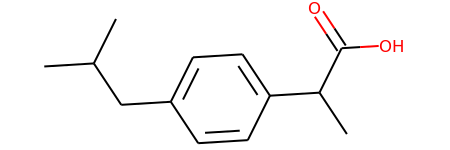

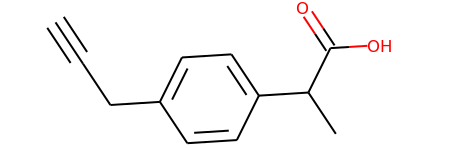

In [2]:
ibu = Chem.MolFromSmiles('CC(C)CC1=CC=C(C=C1)C(C)C(=O)O')
modified_ibu_smile = 'C#CCC1=CC=C(C=C1)C(C)C(=O)O'
modified_ibu = Chem.MolFromSmiles(modified_ibu_smile)
display(ibu, modified_ibu)

In [3]:
def try_lipinksy(molecule):
    return ((Lipinksy.NumHDonors(molecule) < 5) &
            (Lipinksy.NumHAcceptors(molecule) < 10) &
            (Lipinksy.rdMolDescriptors.CalcExactMolWt(molecule) < 500) &
            (Lipinksy.rdMolDescriptors.CalcCrippenDescriptors(molecule)[0] < 5))

print('Ibuprofen is ' + str(try_lipinksy(ibu)))

Ibuprofen is True


In [4]:
strings = np.genfromtxt('1593852703053053315.txt',dtype=np.str)
print('Num of smiles is ' + str(len(strings)))

Num of smiles is 500000


In [6]:
print(strings[:5])

[['137203395'
  'CN1C(=NN=N1)SCC2=C(N3[C@@H]([C@@H](C3=O)NC(=O)/C(=N\\OCC(=O)O)/C4=CC=NN4)SC2)C(=O)O']
 ['145996911'
  'CC(=O)N[C@@H]1[C@H](C=C(OC1[C@@H]([C@@H](COC(=O)C)OC(=O)C)OC(=O)C)C(=O)O)N=[N+]=[N-]']
 ['139600833' 'C1=C(N=C2C(=N1)N=NN2CC(F)(F)F)Cl']
 ['138028772' 'CCN1C2=C(C=C(C=C2)C(=O)O)N=C1CN3CCCN4C(=CN=N4)C3']
 ['137945398' 'CCOC(=O)C1=CN(N=N1)CC2CNC2']]


In [7]:
smiles= []
for line in strings:
    if len(line[1]) < 30 and not '.' in line[1]:
        smiles.append(line[1])
print('Num of suitable smiles is ' + str(len(smiles)))

Num of suitable smiles is 55799


In [8]:
azid = 'N=[N+]=[N-]'
result_of_reaction = 'N2C=C(N=N2)CC1=CC=C(C=C1)C(C)C(=O)O'
lip5_molecules = []

RDLogger.DisableLog('rdApp.*')
for smile in smiles:
    if azid in smile:
        edited_smile = smile.replace(azid, result_of_reaction)
        try:
            molecule = Chem.MolFromSmiles(edited_smile)
            lip5_molecules.append(molecule) if try_lipinksy(molecule) else None      
        except:
            pass
    else:
        continue

print('Num of suitable molecules is ' + str(len(lip5_molecules)))

Num of suitable molecules is 10406


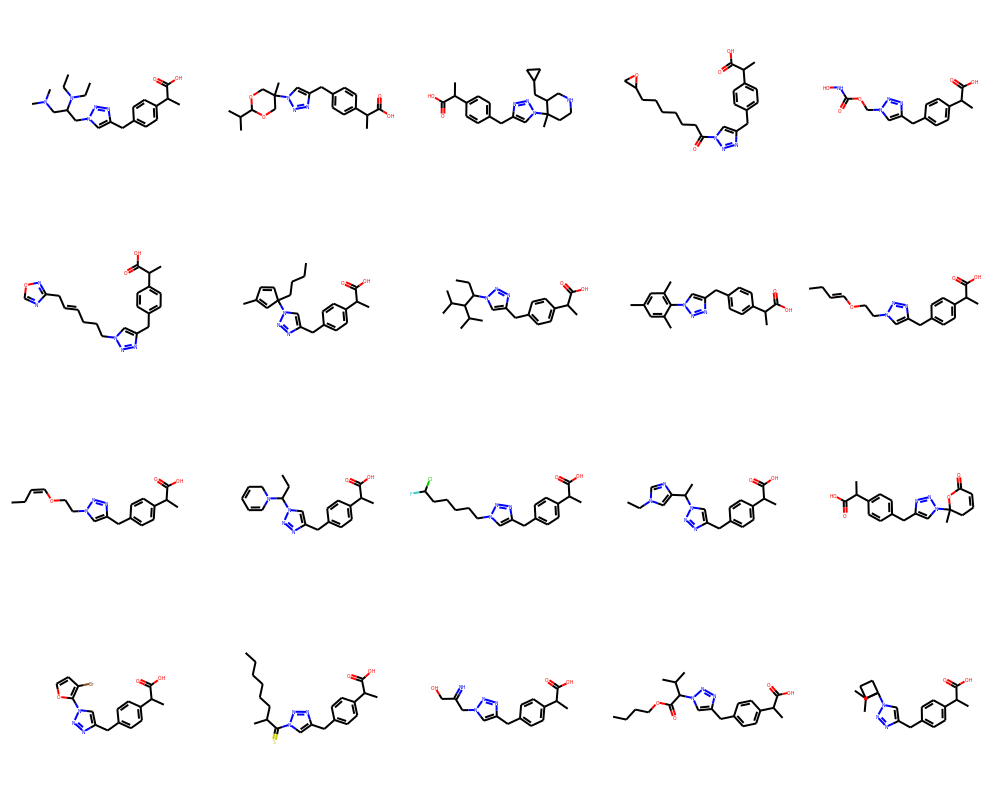

In [9]:
images = Draw.MolsToGridImage(lip5_molecules[100:120], molsPerRow=5, subImgSize=(200, 200))
images

In [12]:
m3d = Chem.AddHs(lip5_molecules[2])
Chem.AllChem.EmbedMolecule(m3d)
AllChem.MMFFOptimizeMolecule(m3d, maxIters=500, nonBondedThresh=200)
import nglview as nv
nv.show_rdkit(m3d)

NGLWidget()

К сожалению, nglview ничего показывать не хочет.